In [101]:
import pandas as pd
import numpy as np
import ast
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

from collections import Counter

In [102]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits= pd.read_csv("tmdb_5000_credits.csv")

movies = movies.merge(credits, on='title')
movies.shape

(4809, 23)

'hi' → Hindi

'ta' → Tamil

'te' → Telugu

'ml' → Malayalam

'kn' → Kannada

'mr' → Marathi

'bn' → Bengali

In [116]:
indian_movies = movies[movies['original_language'].isin(['hi', 'ta', 'te', 'ml', 'kn', 'mr', 'bn'])]

print(f"Total Indian movies: {len(indian_movies)}")
print(indian_movies[['title', 'original_language']].head(10))

Total Indian movies: 22
                         title original_language
1024                     Earth                hi
1291  Baahubali: The Beginning                te
2273                 Ramanujan                ta
2965    Kabhi Alvida Naa Kehna                hi
2974                 Housefull                hi
3092                    Krrish                hi
3160          Jab Tak Hai Jaan                hi
3231   Yeh Jawaani Hai Deewani                hi
3330             Ta Ra Rum Pum                hi
3377                Veer-Zaara                hi


In [103]:
movies = movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew
3201,17926,Undiscovered,A group of aspiring entertainers try to establ...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...","[{""id"": 10183, ""name"": ""independent film""}, {""...","[{""cast_id"": 1001, ""character"": ""Euan Falcon"",...","[{""credit_id"": ""52fe47549251416c7509572b"", ""de..."
2390,332411,I Am Wrath,A man is out for justice after a group of corr...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 9748, ""name"": ""revenge""}, {""id"": 9826,...","[{""cast_id"": 3, ""character"": ""Stanley Hill"", ""...","[{""credit_id"": ""56c5999b9251415475000194"", ""de..."
358,10865,Atlantis: The Lost Empire,The world's most highly qualified crew of arch...,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...","[{""id"": 658, ""name"": ""sea""}, {""id"": 2768, ""nam...","[{""cast_id"": 1, ""character"": ""Milo James Thatc...","[{""credit_id"": ""577ada7d9251415af00004b1"", ""de..."
2802,39780,Oscar and Lucinda,After a childhood of abuse by his evangelistic...,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 3065, ""name"": ""minister""}, {""id"": 5657...","[{""cast_id"": 2, ""character"": ""Oscar Hopkins"", ...","[{""credit_id"": ""52fe47309251416c9106cf95"", ""de..."
3241,773,Little Miss Sunshine,"A family loaded with quirky, colorful characte...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 387, ""name"": ""california""}, {""id"": 115...","[{""cast_id"": 6, ""character"": ""Richard Hoover"",...","[{""credit_id"": ""52fe4275c3a36847f802011b"", ""de..."


In [104]:
import ast

def convert(obj):
    L = []

    if isinstance(obj, str):
        obj = ast.literal_eval(obj)

    for i in obj:

        if isinstance(i, dict):
            L.append(i['name'])
        else:
            L.append(i)
    return L

movies['genres'] = movies['genres'].apply(convert)
movies['keywords'] = movies['keywords'].apply(convert)
movies.sample(5)


,movie_id,title,overview,genres,keywords,cast,crew
3186,14624,The Ultimate Gift,"When his wealthy grandfather finally dies, Jas...","[Romance, Drama, Family]","[grandfather grandson relationship, independen...","[{""cast_id"": 1, ""character"": ""Howard 'Red' Ste...","[{""credit_id"": ""5953c5e7c3a368352601d667"", ""de..."
3020,10984,Valentine,Five friends are stalked and murdered by a mas...,"[Horror, Thriller]","[mobbing, success, violence against women, rev...","[{""cast_id"": 1, ""character"": ""Paige Prescott"",...","[{""credit_id"": ""563b3249c3a3681b5e022ddc"", ""de..."
625,1844,Entrapment,"Two thieves, who travel in elegant circles, tr...","[Romance, Drama, Mystery]","[london england, new year's eve, skyscraper, b...","[{""cast_id"": 2, ""character"": ""Robert \""Mac\"" M...","[{""credit_id"": ""557374dcc3a3686ef900234f"", ""de..."
762,8838,Mercury Rising,Renegade FBI agent Art Jeffries protects a nin...,"[Action, Crime, Drama, Thriller]","[assassin, loss of family, autism, fbi, bangko...","[{""cast_id"": 11, ""character"": ""Art Jeffries"", ...","[{""credit_id"": ""52fe44bec3a36847f80a7833"", ""de..."
2451,4584,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...","[Drama, Romance]","[bowling, based on novel, servant, country lif...","[{""cast_id"": 6, ""character"": ""Marianne Dashwoo...","[{""credit_id"": ""52fe43cec3a36847f807101f"", ""de..."


In [105]:
def convert_cast(obj):
    L = []
    count = 0
    for i in ast.literal_eval(obj):
        if count < 3:
            L.append(i['name'])
            count += 1
    return L

movies['cast'] = movies['cast'].apply(convert_cast)
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew
2988,11873,The Color of Money,"Former pool hustler ""Fast Eddie"" Felson decide...",[Drama],"[bar, billard, talent, hustler, sport]","[Paul Newman, Tom Cruise, Mary Elizabeth Mastr...","[{""credit_id"": ""52fe44979251416c7503a3ad"", ""de..."
4076,657,From Russia with Love,Agent 007 is back in the second installment of...,"[Action, Thriller, Adventure]","[venice, london england, terror, england, assa...","[Sean Connery, Daniela Bianchi, Pedro Armendáriz]","[{""credit_id"": ""52fe4265c3a36847f801b365"", ""de..."
4460,11446,Welcome to the Dollhouse,An unattractive 7th grader struggles to cope w...,"[Comedy, Drama]","[parents kids relationship, sister sister rela...","[Heather Matarazzo, Victoria Davis, Christina ...","[{""credit_id"": ""52fe44419251416c7502e401"", ""de..."
4551,139715,Detention of the Dead,A group of oddball high school students find t...,"[Comedy, Horror]","[high school, independent film, zombie, extrem...","[Jacob Zachar, Alexa Nikolas, Christa Brittany...","[{""credit_id"": ""52fe4c6ac3a368484e1b7457"", ""de..."
1639,8869,Eight Legged Freaks,The residents of a rural mining town discover ...,"[Action, Comedy, Horror, Thriller]","[pick up, wetting pants, hockey mask, barbersh...","[David Arquette, Kari Wuhrer, Scott Terra]","[{""credit_id"": ""52fe44c2c3a36847f80a8535"", ""de..."


In [106]:
def fetch_director(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

movies['crew'] = movies['crew'].apply(fetch_director)
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew
570,3595,Ransom,"When a rich man's son is kidnapped, he coopera...","[Action, Thriller]","[bounty, loss of child, yellow press, fbi, bab...","[Mel Gibson, Gary Sinise, Delroy Lindo]",[Ron Howard]
2285,9378,Thir13en Ghosts,"Arthur and his two children, Kathy and Bobby, ...","[Horror, Thriller]","[hunter, nanny, nudity, collector, house, supe...","[Tony Shalhoub, Embeth Davidtz, Matthew Lillard]",[Steve Beck]
4084,226,Boys Don't Cry,"Female born, Teena Brandon adopts his male ide...","[Crime, Drama]","[rape, sex, identity, small town, love, friend...","[Hilary Swank, Chloë Sevigny, Peter Sarsgaard]",[Kimberly Peirce]
919,2112,Payback,"With friends like these, who needs enemies? Th...","[Drama, Action, Thriller, Crime]","[new york, heroin, money, criminal]","[Mel Gibson, Kris Kristofferson, Gregg Henry]",[Brian Helgeland]
2723,10876,Quills,"A nobleman with a literary flair, the Marquis ...",[Drama],"[asylum, french revolution, french, smuggling,...","[Geoffrey Rush, Kate Winslet, Joaquin Phoenix]",[Philip Kaufman]


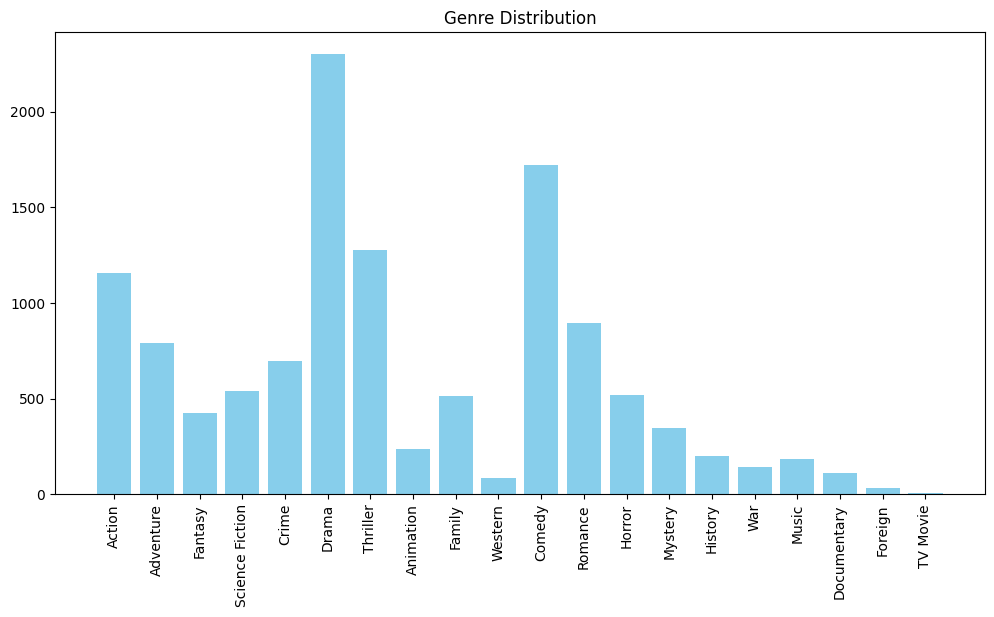

In [107]:

all_genres = [genre for sublist in movies['genres'] for genre in sublist]
genre_counts = Counter(all_genres)

plt.figure(figsize=(12,6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xticks(rotation=90)
plt.title("Genre Distribution")
plt.show()


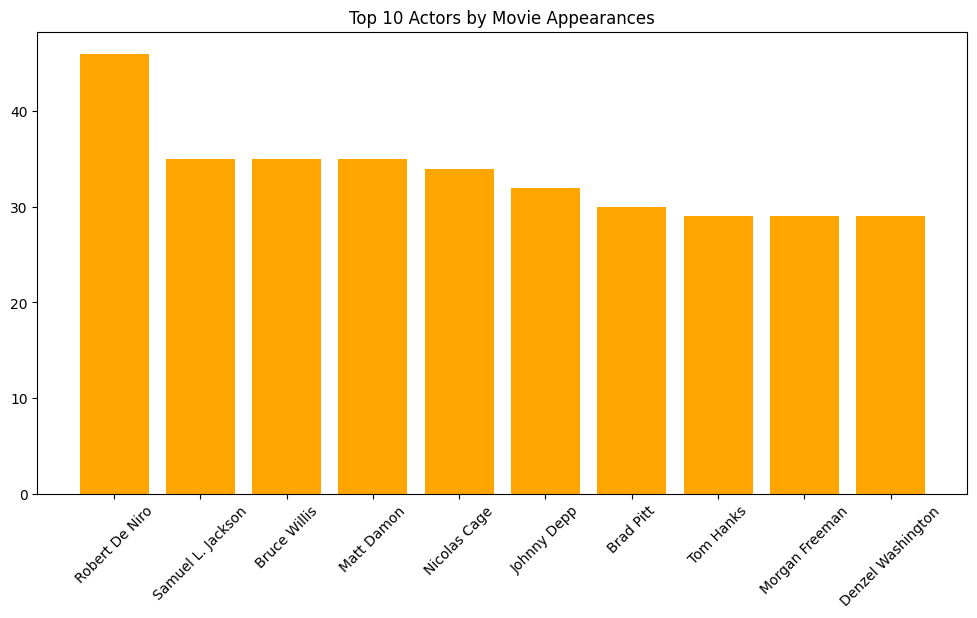

In [108]:
all_actors = [actor for sublist in movies['cast'] for actor in sublist]
actor_counts = Counter(all_actors)
top_10 = actor_counts.most_common(10)

plt.figure(figsize=(12,6))
plt.bar([i[0] for i in top_10], [i[1] for i in top_10], color='orange')
plt.xticks(rotation=45)
plt.title("Top 10 Actors by Movie Appearances")
plt.show()


In [109]:
movies['overview'] = movies['overview'].fillna('') 
movies['overview'] = movies['overview'].apply(lambda x: x.split())
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew
4548,43933,Monsters,"[Six, years, ago, NASA, discovered, the, possi...","[Drama, Thriller, Science Fiction]","[monster, pyramid, radio, dystopia, infection,...","[Whitney Able, Scoot McNairy, Annalee Jefferies]",[Gareth Edwards]
1242,1921,Sweet November,"[Nelson, is, a, man, devoted, to, his, adverti...","[Drama, Romance]","[workaholic, dogsitter]","[Keanu Reeves, Charlize Theron, Jason Isaacs]",[Pat O'Connor]
3482,1443,The Virgin Suicides,"[A, group, of, male, friends, become, obsessed...","[Drama, Romance]","[michigan, 1970s, youth, family, woman director]","[James Woods, Kathleen Turner, Kirsten Dunst]",[Sofia Coppola]
1911,276907,Legend,"[Suave,, charming, and, volatile,, Reggie, Kra...","[Crime, Thriller]","[biography, based on true story, gangster, twins]","[Tom Hardy, Emily Browning, Christopher Eccles...",[Brian Helgeland]
4100,1382,Me and You and Everyone We Know,"[The, feature, film, debut, by, artist, Mirand...","[Comedy, Drama]","[brother brother relationship, playground, ind...","[Miranda July, John Hawkes, Brandon Ratcliff]",[Miranda July]


In [110]:
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])
movies.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew
1238,8970,The Out-of-Towners,"[The, remake, of, the, 1970, Neil, Simon, come...",[Comedy],"[newyork, travel, misfortune]","[SteveMartin, GoldieHawn, JohnCleese]",[SamWeisman]
733,9302,Up Close & Personal,"[Tally, Atwater, has, a, dream:, to, be, a, pr...","[Drama, Romance]","[miami, television, career, vitaminb, reporter]","[RobertRedford, MichellePfeiffer, StockardChan...",[JonAvnet]
3654,56930,Tycoon,"[Engineer, Johnny, Munroe, is, enlisted, to, b...","[Action, Drama, Romance]","[mountains, engineer, railroad, ethics]","[JohnWayne, LaraineDay, CedricHardwicke]",[RichardWallace]
1827,12589,Jimmy Neutron: Boy Genius,"[Jimmy, Neutron, is, a, boy, genius, and, way,...","[Action, Adventure, Animation, Comedy, Family,...","[showdown, gi, villain, genius, alien, rescue,...","[DebiDerryberry, MeganCavanagh, MarkDeCarlo]",[JohnA.Davis]
496,109451,Cloudy with a Chance of Meatballs 2,"[After, the, disastrous, food, storm, in, the,...","[Animation, Family, Comedy]","[inventor, food, scientist]","[BillHader, AnnaFaris, JamesCaan]",[CodyCameron]


In [111]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
new_df = movies[['movie_id', 'title', 'tags']]
new_df.sample(5)

,movie_id,title,tags
3359,2074,Flirting with Disaster,"[Adopted, as, a, child,, new, father, Mel, Col..."
4707,5822,Sweet Sweetback's Baadasssss Song,"[After, saving, a, Black, Panther, from, some,..."
1029,593,Solaris,"[Ground, control, has, been, receiving, strang..."
545,9741,Unbreakable,"[An, ordinary, man, makes, an, extraordinary, ..."
2462,13788,The Unborn,"[A, young, woman, fights, the, spirit, that, i..."


example1:
| Movie     | sci-fi | action | romance | adventure | leo | nolan |
| --------- | ------ | ------ | ------- | --------- | --- | ----- |
| Inception | 1      | 1      | 0       | 1         | 0   | 1     |
| Titanic   | 0      | 0      | 1       | 0         | 1   | 0     |

Step 1: Represent as vectors

    Inception vector: [1, 1, 0, 1, 0, 1]
    Titanic vector: [0, 0, 1, 0, 1, 0]

Step 2: Dot product

    1∗0+1∗0+0∗1+1∗0+0∗1+1∗0=0
    
Step 3: Magnitudes

    ||A|| = sqrt{1^2 + 1^2 + 0^2 + 1^2 + 0^2 + 1^2}=sqrt{4}=2
    ||B|| = sqrt{0^2 + 0^2 + 1^2 + 0^2 + 1^2 + 0^2} =sqrt{2} 1.414

Step 4: Cosine similarity

    similarity=0/2∗1.4140​=0

exmaple2:
| Movie        | sci-fi | action | romance | adventure | leo | nolan |
| ------------ | ------ | ------ | ------- | --------- | --- | ----- |
| Inception    | 1      | 1      | 0       | 1         | 0   | 1     |
| Interstellar | 1      | 0      | 0       | 1         | 0   | 1     |

Step 1: Represent as vectors

    Inception = [1, 1, 0, 1, 0, 1]

    Interstellar = [1, 0, 0, 1, 0, 1]

Step 2: Dot product

    1∗1+1∗0+0∗0+1∗1+0∗0+1∗1=1+0+0+1+0+1=3

Step 3: Magnitudes

    Inception=sqrt{1^2 + 1^2 + 0^2 + 1^2 + 0^2 + 1^2} =sqrt{4} = 2
    Interstellar=sqrt{1^2 + 0^2 + 0^2 + 1^2 + 0^2 + 1^2} =sqrt{3}=1.732

Step 4: Cosine similarity

             similarity=3/(2*1.732)=0.866

In [112]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))
new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())

cv = CountVectorizer(max_features=5000, stop_words='english')#Converts text data into a matrix of token counts.
vectors = cv.fit_transform(new_df['tags']).toarray()
vectors

C:\Users\gulab\AppData\Local\Temp\ipykernel_32880\2421924965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))
C:\Users\gulab\AppData\Local\Temp\ipykernel_32880\2421924965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: x.lower())


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4809, 5000))

In [113]:
similarity = cosine_similarity(vectors)
print(similarity)

[[1.         0.08858079 0.05812382 ... 0.02450715 0.02599376 0.        ]
 [0.08858079 1.         0.06350006 ... 0.02677398 0.         0.        ]
 [0.05812382 0.06350006 1.         ... 0.02635231 0.         0.        ]
 ...
 [0.02450715 0.02677398 0.02635231 ... 1.         0.07071068 0.04774099]
 [0.02599376 0.         0.         ... 0.07071068 1.         0.05063697]
 [0.         0.         0.         ... 0.04774099 0.05063697 1.        ]]


In [114]:
def smart_recommend(query):
    query_lower = query.lower().replace(" ", "")
    
    if query in new_df['title'].values:
        movie_index = new_df[new_df['title'] == query].index[0]
        distances = similarity[movie_index]
        movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
        print(f"Because you liked '{query}', you might also like:")
        for i in movies_list:
            print("-", new_df.iloc[i[0]].title)
    
    elif any(new_df['tags'].str.replace(" ", "").str.lower().str.contains(query_lower)):
        filtered_movies = new_df[new_df['tags'].str.replace(" ", "").str.lower().str.contains(query_lower)]
        print(f"Movies related to '{query}':")
        for title in filtered_movies['title'].head(10):
            print("-", title)
    
    else:
        print(f"No movies found for '{query}'. Check spelling or try another keyword!")

smart_recommend("Inception")        
smart_recommend("action")             
smart_recommend("Leonardo DiCaprio")  


Because you liked 'Inception', you might also like:
- Duplex
- The Helix... Loaded
- Star Trek II: The Wrath of Khan
- Transformers: Revenge of the Fallen
- Timecop
Movies related to 'action':
- Avatar
- Pirates of the Caribbean: At World's End
- Spectre
- The Dark Knight Rises
- John Carter
- Spider-Man 3
- Tangled
- Avengers: Age of Ultron
- Batman v Superman: Dawn of Justice
- Superman Returns
Movies related to 'Leonardo DiCaprio':
- Titanic
- The Great Gatsby
- Inception
- The Revenant
- The Aviator
- Django Unchained
- Blood Diamond
- The Wolf of Wall Street
- Gangs of New York
- The Departed
